**Objetivo**: A atividade se resume em filtrar um sinal de áudio composto por uma música somada por um sinal modulado
(deslocado na frequência). O filtro passa-baixa deverá ser parametrizado através da escolha do parâmetro 𝑊, largura
do filtro, a fim de remover o sinal modulado. Para tal, o filtro desenhado atuará como um sistema LIT.

Nessa primeira parte do trabalho, nós iremos transformar o arquivo de áudio em um vetor e a partir daí iremos plotar o seu sinal no espectro do tempo e no espectro da frequência. Para isso vamos utilizar a linguagem Python com ajuda de algumas bibliotecas.

Desso modo, temos:

Tamanho da amostra:  1323000
Taxa de amostragem:  22050
Vetor valores do áudio:  [ 3.000e+00 -1.200e+01  1.200e+01 ...  1.472e+03 -3.190e+03  3.429e+03]

******************GRÁFICO DO SINAL*******************


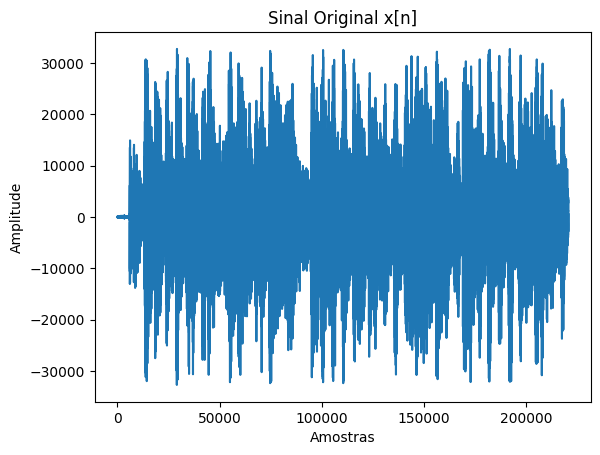

******************GRÁFICO DA MAGNITUDE*******************


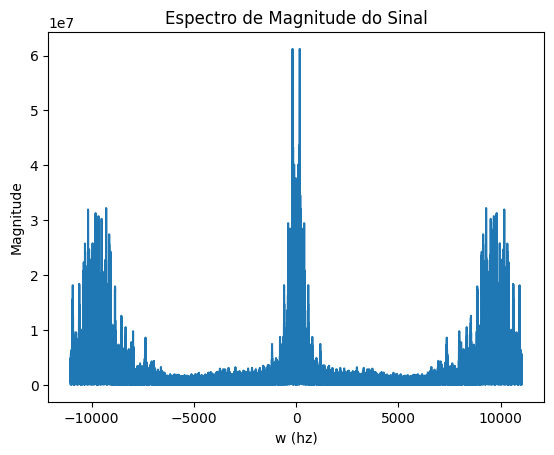

In [1]:
import numpy as np
from scipy.io.wavfile import read
from matplotlib import pyplot as plt

#Para que o código funcione adequadamente, o caminho do arquivo deve ser o caminho necessário para chegar ao arquivo "ImperialPlusCantina.wav"
caminho_arquivo = 'C:/Users/User/Desktop/6 Semestre/Sinais e Sistemas/Trabalhos/Trabalho filtro/ImperialPlusCantina.wav'
taxa_amostragem, x = read(caminho_arquivo)

#transformando o audio em array
audio_array = np.array(x,dtype=float)
print("Tamanho da amostra: "     , len(x))
print("Taxa de amostragem: "     , taxa_amostragem)
print("Vetor valores do áudio: " , audio_array)

#Limitando o processamento para 10 segundos
x = x[:taxa_amostragem*10]


print("\n******************GRÁFICO DO SINAL*******************")
plt.plot(x)
plt.title('Sinal Original x[n]')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

#Calculando a transformada de x[n]
X = np.fft.fft(x)
magnitude_x = np.fft.fftfreq(len(X), 1/taxa_amostragem)

print("******************GRÁFICO DA MAGNITUDE*******************")
plt.plot(magnitude_x , np.abs(X))
plt.title('Espectro de Magnitude do Sinal')
plt.xlabel('w (hz)')
plt.ylabel('Magnitude')
plt.show()


Com base nos plots anteriores, conseguimos observar que no meio do gráfico da magnitude, temos o sinal desejado. Precisamos agora filtrar o ruído que fica nas laterais.

Para isso, vamos criar o Filtro passa-baixa, e então implementar a resposta ao impulso $h[n]$ com largura W, que é um pulso retangular. Assim, vamos filtrar a parte do sinal que queremos.

No gráfico anterior (Gráfico da magnitude) é possível observar que a parte do sinal em que queremos está entre a frequência de [-5000 - 5000].

Daí, implementando o filtro, temos:


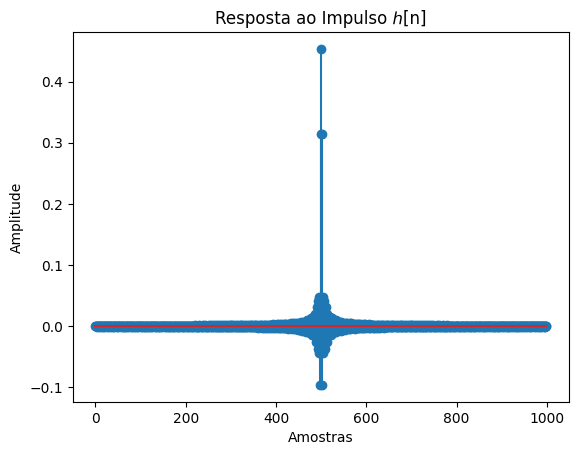

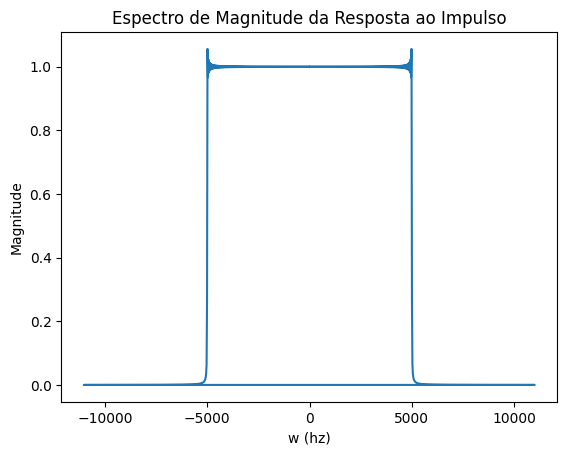

In [2]:
W = 5000
#declaro h[n] sendo uma funcao sinc
n = np.arange(0, 1000)
h = np.sinc(2 * W * (n - len(n)//2) / taxa_amostragem)

h = h / np.sum(h) #Garantimos que a soma dos coeficientes seja 1

plt.stem(n, h)
plt.title('Resposta ao Impulso ℎ[n]')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

# Calculando a Transformada de Fourier de h[n]
H = np.fft.fft(h)

# Plotando o espectro de magnitude da resposta ao impulso
magnitude_h = np.fft.fftfreq(len(H), 1/taxa_amostragem)
plt.plot(magnitude_h, np.abs(H))
plt.title('Espectro de Magnitude da Resposta ao Impulso')
plt.xlabel('w (hz)')
plt.ylabel('Magnitude')
plt.show()

De acordo com a teoria, estamos considerando $h[n]$ sendo uma função sinc. Daí, sabemos que a resposta ao impulso $ h[n]$ no domínio do tempo, graficamente, é pra ser um gráfico que se assemelha a uma senóide, tendo um lóbulo principal centrado em torno do zero, com zeros ocorrendo em intervalos regulares. Graficamente, através da implementação, conseguimos observar que nos aproximamos do esperado, não ficando tão evidente como observado em modelos ideais, mas uma aproximação bem plausível para uma implementação.

Seguindo a teoria, também sabemos que a Transformada de Fourier da função sinc é um pulso retangular. Observando o gráfico da implementação, conseguimos plotar um pulso retangular com abertura dentro do intervalo solicitado, ou seja, conseguimos apresentar o que se era esperado.

Agora que implementamos nosso filtro, desejamos encontrar a resposta de saída $y[n]$, para isso, iremos utilizar as propriedades da Transformada de Fourier vistas em sala de aula.

Utilizando a propriedade da convolução, temos:

"Seja $x[n]$ e $y[n]$ os sinais de entrada e saída, respectivamente, de um
sistema LIT caracterizado pela resposta ao impulso $h[n]$. Assim, no domínio do tempo, temos:

$y[n] = x[n] * h[n]$

Aplicando a Transformada de Fourier, tem-se que:

$ Y(e^{j\omega}) = X(e^{j\omega}) \cdot H(e^{j\omega})$ "

Daí, vamos achar $y[n]$ dos dois modos, primeiro calculando a convolução, e depois pela multiplicação no espectro da frequência.

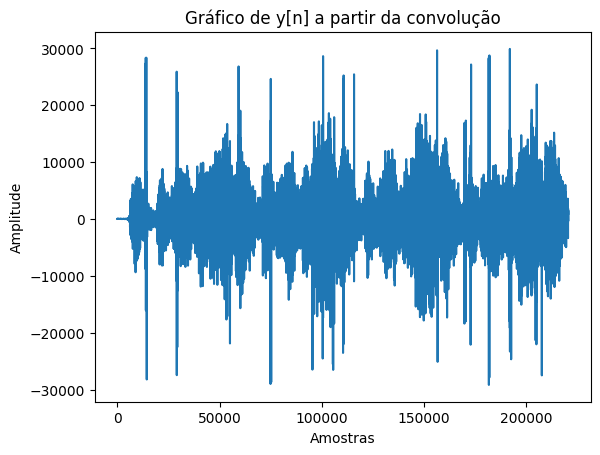

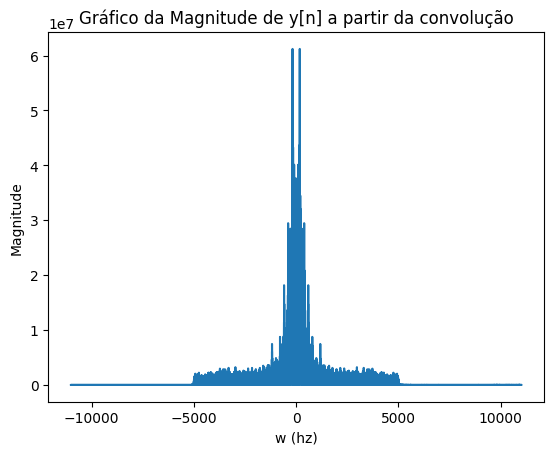

In [3]:
#Método da convolução no tempo:
#calculo do y[n]
y_conv = np.convolve(x , h , mode = 'same') #Utilizamos o mode = 'same' para a saída ter o mesmo tamanho da entrada.

plt.plot(y_conv)
plt.title('Gráfico de y[n] a partir da convolução')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

#Calculamos a transformada de y[n]
Y_conv = np.fft.fft(y_conv)

magnitude_Y_conv = np.fft.fftfreq(len(Y_conv), 1/taxa_amostragem)
plt.plot(magnitude_Y_conv, np.abs(Y_conv))
plt.title('Gráfico da Magnitude de y[n] a partir da convolução')
plt.xlabel('w (hz)')
plt.ylabel('Magnitude')
plt.show()


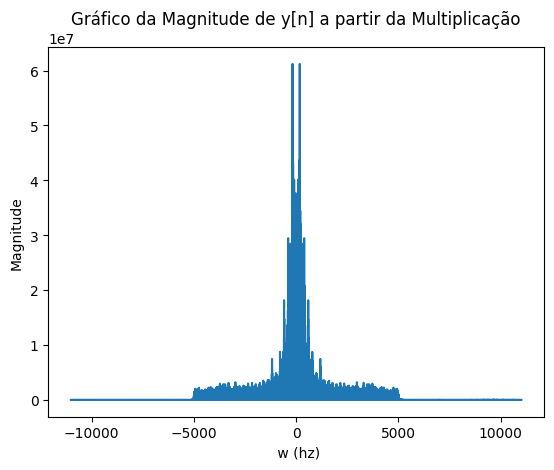

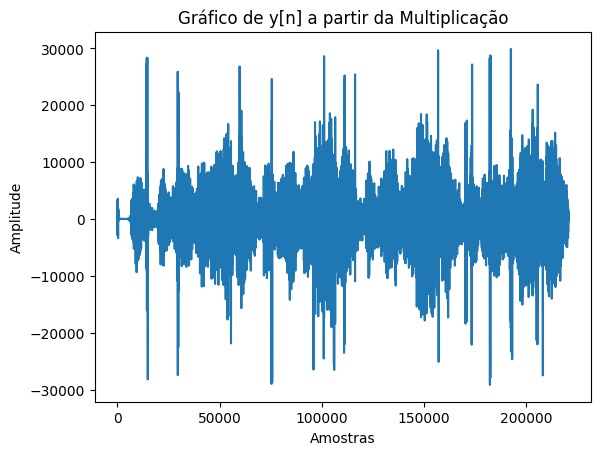

In [4]:
#Método da Multiplicação
#Adapto h[n] para que tenha mesmo tamanho que x[n]
h_adaptado = np.pad(h, (0, len(x) - len(h)))

# Calculo a Transformada de Fourier de x[n]
X = np.fft.fft(x)

# Calculo a Transformada de Fourier de h_adaptado[n]
H_adaptado = np.fft.fft(h_adaptado)

# Multiplico as Transformadas de Fourier de x[n] e h_adaptado[n]
Y_multi = X * H_adaptado

magnitude_Y_multi = np.fft.fftfreq(len(Y_multi), 1/taxa_amostragem)
plt.plot(magnitude_Y_multi, np.abs(Y_multi))
plt.title('Gráfico da Magnitude de y[n] a partir da Multiplicação')
plt.xlabel(' w (hz)')
plt.ylabel('Magnitude')
plt.show()

#Realizo a transformada inversa de Y(ejw) para obter y[n]
y_multi = np.fft.ifft(Y_multi)

plt.plot(y_multi.real)
plt.title('Gráfico de y[n] a partir da Multiplicação')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()


Como explicamos acima através da propriedade, podemos encontrar $y[n]$ de duas maneiras:


1.   Através da convolução $y[n]$ =  $x[n]$*$y[n]$
2.   Calculando a transformada inversa de $ Y(e^{j\omega}) = X(e^{j\omega}) \cdot H(e^{j\omega})$

Desse modo, podemos escrever as seguintes igualdades:


1.   A Transformada de Fourier $y[n]$ obtida através da convolução no tempo, é igual a multiplicação $X(e^{j\omega}) \cdot H(e^{j\omega})$ obtida no domínio da frequência.
2.   A Transformada Inversa de Fourier da multiplicação no domínio da frequência de $X(e^{j\omega}) \cdot H(e^{j\omega})$, é igual a $y[n]$ no domínio do tempo.

Desse modo, plotamos os gráficos da Transformada de Fourier de $y[n]$ obtida no domínio do tempo e comparamos com o plot de $ Y(e^{j\omega})$ obtida na frequência. Como é possível observar, obtemos o mesmo gráfico, confirmando o que se era esperado.

Ademais, também plotamos o gráfico da Transformada Inversa de Fourier de $ Y(e^{j\omega})$ obtida através da multiplicação na frequência e comparamos com $y[n]$ obtido através da convolução no tempo. Também obtemos o mesmo gráfico, validando o que se era esperado de acordo com a propriedade.






Por fim, segue o código para execução do resultado obtido tanto através da convolução, como através da multiplicação.

In [5]:
from scipy.io.wavfile import write
#Especificando onde devo salvar os sinais
audio_filtrado_convolucao = 'C:/Users/User/Desktop/6 Semestre/Sinais e Sistemas/Trabalhos/Trabalho filtro/y_conv.wav'
audio_filtrado_multiplicacao = 'C:/Users/User/Desktop/6 Semestre/Sinais e Sistemas/Trabalhos/Trabalho filtro/y_multi.wav'

# Escrevendo o sinal filtrado obtido pela convolução
write(audio_filtrado_convolucao, taxa_amostragem, y_conv.real.astype(np.int16))

# Escrevendo o sinal filtrado obtido pela multiplicação na frequência
write(audio_filtrado_multiplicacao, taxa_amostragem, y_multi.real.astype(np.int16))


# **Referências**

Oppenheim, Alan V.Sinais e Sistemas.2ªed.SãoPaulo:PearsonPrenticeHall,1997.